In [13]:
import pandas as pd
import scipy
import matplotlib.pyplot as plt
from scipy.stats import pearsonr, f_oneway, chi2_contingency



<h1>Задание 1</h1>

есть небольшой искусственный датасет: https://www.kaggle.com/datasets/iamsouravbanerjee/customer-shopping-trends-dataset/data   
Необходимо прочитать его и представить в виде df 

In [3]:
pd.read_csv('shopping_trends_updated.csv')

,Customer ID,Age,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Season,Review Rating,Subscription Status,Shipping Type,Discount Applied,Promo Code Used,Previous Purchases,Payment Method,Frequency of Purchases
0,1,55,Male,Blouse,Clothing,53,Kentucky,L,Gray,Winter,3.1,Yes,Express,Yes,Yes,14,Venmo,Fortnightly
1,2,19,Male,Sweater,Clothing,64,Maine,L,Maroon,Winter,3.1,Yes,Express,Yes,Yes,2,Cash,Fortnightly
2,3,50,Male,Jeans,Clothing,73,Massachusetts,S,Maroon,Spring,3.1,Yes,Free Shipping,Yes,Yes,23,Credit Card,Weekly
3,4,21,Male,Sandals,Footwear,90,Rhode Island,M,Maroon,Spring,3.5,Yes,Next Day Air,Yes,Yes,49,PayPal,Weekly
4,5,45,Male,Blouse,Clothing,49,Oregon,M,Turquoise,Spring,2.7,Yes,Free Shipping,Yes,Yes,31,PayPal,Annually
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3895,3896,40,Female,Hoodie,Clothing,28,Virginia,L,Turquoise,Summer,4.2,No,2-Day Shipping,No,No,32,Venmo,Weekly
3896,3897,52,Female,Backpack,Accessories,49,Iowa,L,White,Spring,4.5,No,Store Pickup,No,No,41,Bank Transfer,Bi-Weekly
3897,3898,46,Female,Belt,Accessories,33,New Jersey,L,Green,Spring,2.9,No,Standard,No,No,24,Venmo,Quarterly
3898,3899,44,Female,Shoes,Footwear,77,Minnesota,S,Brown,Summer,3.8,No,Express,No,No,24,Venmo,Weekly


In [14]:
trends = pd.read_csv('shopping_trends.csv')
trends.columns

Index(['Customer ID', 'Age', 'Gender', 'Item Purchased', 'Category',
       'Purchase Amount (USD)', 'Location', 'Size', 'Color', 'Season',
       'Review Rating', 'Subscription Status', 'Payment Method',
       'Shipping Type', 'Discount Applied', 'Promo Code Used',
       'Previous Purchases', 'Preferred Payment Method',
       'Frequency of Purchases'],
      dtype='object')

<h1>Задание 2.1</h1>

На основании данных из задания 1 необходимо составить максимальное(миним 5) кол-во гипотез о корреляциях между отдельными столбцами и проверить их (аналогично воршопу). При этом при составлении гипотез можно рассматривать не полный df, а именно выборки (например: "женщины старше 40 лет покапают в основном осенью")

In [15]:
print('1 гипотеза')
print('Проверим гипотезу, что молодые люди совершают лёгкие покупки, а взрослые более дорогие, то есть что') 

# Выберите столбцы "Age" и "Purchase Amount"
age = trends['Age']
purchase_amount = trends['Purchase Amount (USD)']

# Вычислите коэффициент корреляции Пирсона и p-value
correlation, p_value = pearsonr(age, purchase_amount)

# Выведите коэффициент корреляции и p-value
print(f" Коэффициент корреляции между возрастом и суммой покупки: {correlation}")
print(f" P-значение (p-value): {p_value}")

# Оцените статистическую значимость корреляции
alpha = 0.05  # Уровень значимости
if p_value < alpha:
    print(" Корреляция статистически значима между возрастом и стоимостью покупок (p-value < 0.05), гипотезу подтверждаем.")
else:
    print(" Корреляция не статистически значима между возрастом и стоимостью покупок (p-value >= 0.05), гипотезу опровергаем.")

print('\n')

print('2 гипотеза')
print('Существует корреляция между рейтингом отзывов (Review Rating) и суммой покупки (Purchase Amount).')
print('Гипотеза звучит так: "Покупатели, которые оставляют более высокие оценки товарам, совершают более крупные покупки."') 
      
review_rating = trends['Review Rating']
purchase_amount = trends['Purchase Amount (USD)']

correlation, p_value = pearsonr(review_rating, purchase_amount)

print(f" Коэффициент корреляции между рейтингом отзывов и суммой покупки: {correlation}")
print(f" P-значение (p-value): {p_value}")


alpha = 0.05
if p_value < alpha:
    print(" Корреляция между рейтингом и стоимостью покупки статистически значима (p-value < 0.05), гипотезу подтверждаем. Гипотезу принимаем")
else:
    print(" Корреляция между рейтингом и стоимостью покупки не статистически значима (p-value >= 0.05), гипотезу опровергаем. Гипотезу отклоняем")

print('\n')

print('3 Гипотеза')
print('Существует корреляция между рейтингом отзывов (Review Rating) и частотой покупок (Frequency of Purchases).')
print('Гипотеза звучит так: "Покупатели, оставляющие более высокие оценки товаров, совершают покупки чаще."')

review_rating = trends['Review Rating']
frequency_of_purchases = pd.factorize(trends['Frequency of Purchases'])[0]

correlation, p_value = pearsonr(review_rating, frequency_of_purchases)

print(f" Коэффициент корреляции между рейтингом отзывов и частотой покупок: {correlation}")
print(f" P-значение (p-value): {p_value}")

alpha = 0.05
if p_value < alpha:
    print(" Корреляция между Review Rating и Frequency of Purchases статистически значима (p-value < 0.05). Гипотезу принимаем")
else:
    print(" Корреляция между Review Rating и Frequency of Purchases не статистически значима (p-value >= 0.05). Гипотезу отклоняем.")

print('\n')

print('4 Гипотеза')
print('Существует корреляция между суммой покупки (Purchase Amount) и методом оплаты (Payment Method).')
print('Гипотеза звучит так: "Покупатели, использующие определенный метод оплаты, совершают более крупные покупки."')

purchase_amount = trends['Purchase Amount (USD)']
payment_method = trends['Payment Method']

# Применим однофакторный дисперсионный анализ (ANOVA)
groups = trends.groupby(payment_method)
anova_results = f_oneway(*[group["Purchase Amount (USD)"] for name, group in groups])

print(" Результаты однофакторного дисперсионного анализа (ANOVA):")
print(anova_results)

alpha = 0.05
if anova_results.pvalue < alpha:
    print(" Различия в суммах покупок в зависимости от метода оплаты статистически значимы (p-value < 0.05). Гипотезу применяем")
else:
    print(" Различия в суммах покупок в зависимости от метода оплаты не статистически значимы (p-value >= 0.05). Гипотезу отклоняем")

print('\n')

print('5 Гипотеза')
print('Существует корреляция между суммой покупки (Purchase Amount) и методом оплаты (Payment Method).')
print('Гипотеза звучит так: "Покупатели, использующие определенный метод оплаты, совершают более крупные покупки."')

discount_applied = trends['Discount Applied']
promo_code_used = trends['Promo Code Used']

cross_table = pd.crosstab(discount_applied, promo_code_used)

chi2, p, _, _ = chi2_contingency(cross_table)
n = cross_table.values.sum()
phi2 = chi2 / n
r, k = cross_table.shape
phi2corr = max(0, phi2 - ((k - 1) * (r - 1)) / (n - 1))
r_corr = r - ((r - 1)**2) / (n - 1)
k_corr = k - ((k - 1)**2) / (n - 1)
correlation = (phi2corr / min((k_corr - 1), (r_corr - 1)))**0.5

print(f" Коэффициент корреляции Крамера между 'Discount Applied' и 'Promo Code Used': {correlation}")
print(f" P-значение (p-value): {p}")

alpha = 0.05
if p < alpha:
    print(" Корреляция между 'Discount Applied' и 'Promo Code Used' статистически значима (p-value < 0.05). Гипотезу принимаем")
else:
    print(" Корреляция между 'Discount Applied' и 'Promo Code Used' не статистически значима (p-value >= 0.05). Гипотезу отклоняем")

1 гипотеза
Проверим гипотезу, что молодые люди совершают лёгкие покупки, а взрослые более дорогие, то есть что
 Коэффициент корреляции между возрастом и суммой покупки: -0.010423647378686516
 P-значение (p-value): 0.5151978241224925
 Корреляция не статистически значима между возрастом и стоимостью покупок (p-value >= 0.05), гипотезу опровергаем.


2 гипотеза
Существует корреляция между рейтингом отзывов (Review Rating) и суммой покупки (Purchase Amount).
Гипотеза звучит так: "Покупатели, которые оставляют более высокие оценки товарам, совершают более крупные покупки."
 Коэффициент корреляции между рейтингом отзывов и суммой покупки: 0.03077592307391447
 P-значение (p-value): 0.054631573624773264
 Корреляция между рейтингом и стоимостью покупки не статистически значима (p-value >= 0.05), гипотезу опровергаем. Гипотезу отклоняем


3 Гипотеза
Существует корреляция между рейтингом отзывов (Review Rating) и частотой покупок (Frequency of Purchases).
Гипотеза звучит так: "Покупатели, оставля

<h1>Задание 2.2</h1>

Помимо гипотез, давайте найдем самый популярный товар, построим распределение покупателей по полу, определим какой пол(и отдельно возраст) покупает больше всего, чаще всего, самые дорогие товары. Определим есть ли зависимость между цветом одежды и сезоном. Так же посчитаем наш сезонный mau (уникальных пользователей за сезон) и его динамику. Так же давайте найдем самую популярную букву в названии одежды. 

In [16]:
# Самый популярный товар ( по рейтингу )
popular_item = trends.groupby('Item Purchased')['Review Rating'].agg(Mean_Rating='mean').sort_values(by='Mean_Rating', ascending=False).iloc[0]
print("Популярный товар:\n", popular_item)

# Распределение покупателей по полу
gender_distribution = trends['Gender'].value_counts()
print("Распределение покупателей по полу:\n", gender_distribution)

# Кто покупает самые дорогие товары
expensive_item = trends.groupby(['Gender', 'Age'])['Purchase Amount (USD)'].agg(Max_Purchase='max').sort_values(by='Max_Purchase', ascending=False)
max_expensive_item = expensive_item['Max_Purchase'].max()

# Больше всего возрастов мужчин покупают дорогие товары
max_expensive_records = expensive_item[expensive_item['Max_Purchase'] == max_expensive_item]
max_expensive_records.sort_values(by=['Gender', 'Age'])

max_purchase = trends['Purchase Amount (USD)'].max()
more_items = trends[trends['Purchase Amount (USD)'] == max_purchase]
more_items = more_items.groupby(['Gender', 'Age'])['Item Purchased'].agg(Count_Purchase='count')
mx = more_items['Count_Purchase'].max()
more_items['Item Purchase'] = max_purchase
more_items[more_items['Count_Purchase'] == mx]

Популярный товар:
 Mean_Rating    3.864286
Name: Gloves, dtype: float64
Распределение покупателей по полу:
 Gender
Male      2652
Female    1248
Name: count, dtype: int64


,,Count_Purchase,Item Purchase
Gender,Age,,
Male,20,3,100


In [39]:
# Какой пол ( отдельно возраст ) покупает больше всего товаров, чаще всего покупает, самые дорогие

trends.groupby(['Gender', 'Age'])['Item Purchased'].agg(Count_purchased='count').sort_values(by='Count_purchased', ascending=False).iloc[0]

# Мужчина в возрасте 54 года покупают больше всего товаров

# Определим есть ли зависимость между цветом одежды и сезоном

color_season = trends[['Season', 'Color']]
color_season['Color'] = pd.factorize(color_season['Color'])[0]
color_season['Season'] = pd.factorize(color_season['Season'])[0]
print(color_season.corr())

# Коэффициент корреляции 0.021034, что означает что связь есть, но она очень слабая и практически незаметная

chi2, p, _, _ = chi2_contingency(cross_table)

alpha = 0.05

if p < alpha:
    print("Есть статистически значимая зависимость между цветом одежды и сезоном.")
else:
    print("Нет статистически значимой зависимости между цветом одежды и сезоном.")

C:\Users\Acer\AppData\Local\Temp\ipykernel_724\3503400580.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  color_season['Color'] = pd.factorize(color_season['Color'])[0]
C:\Users\Acer\AppData\Local\Temp\ipykernel_724\3503400580.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  color_season['Season'] = pd.factorize(color_season['Season'])[0]


          Season     Color
Season  1.000000  0.021034
Color   0.021034  1.000000
Нет статистически значимой зависимости между цветом одежды и сезоном.


In [17]:
# Для каждого сезона посчитайте MAU
seasonly_mau = trends.groupby('Season')['Customer ID'].agg(MAU_Season='count').sort_values(by='MAU_Season', ascending=False)

# Выведите сезонный MAU
print("Сезонный MAU:\n", seasonly_mau)

# Вычислите динамику MAU для каждого сезона
seasonly_mau_dynamics = seasonly_mau.unstack()
print("Динамика сезонного MAU:\n", seasonly_mau_dynamics)

Сезонный MAU:
         MAU_Season
Season            
Spring         999
Fall           975
Winter         971
Summer         955
Динамика сезонного MAU:
             Season
MAU_Season  Spring    999
            Fall      975
            Winter    971
            Summer    955
dtype: int64


In [19]:
# Самая популярная буква в названии одежды

d = {}

items = trends['Item Purchased']
for item in items.values:
    for symbol in item:
        d[symbol] = d.get(symbol, 0) + 1

d

{'B': 619,
 'l': 964,
 'o': 1528,
 'u': 332,
 's': 2483,
 'e': 2347,
 'S': 1580,
 'w': 335,
 'a': 2312,
 't': 1749,
 'r': 1434,
 'J': 458,
 'n': 914,
 'd': 464,
 'k': 911,
 'h': 623,
 'i': 625,
 'C': 161,
 'H': 458,
 'b': 153,
 'g': 314,
 'D': 166,
 'P': 171,
 'c': 765,
 'y': 171,
 'T': 147,
 '-': 147,
 'f': 157,
 'p': 143,
 'G': 140,
 'v': 140}

In [20]:
print("Частовстречаемый элемент {} с частотой повторений {}".format('s', d['s']))

Частовстречаемый элемент s с частотой повторений 2483


<h1>Задание 3</h1> 

У нас есть данные о потреблении алкоголя о потреблнеии Алкоголя в мире https://github.com/fivethirtyeight/data/tree/master/alcohol-consumption. 

Давайте представим эти данные в виде df, где же люди пьют больше вина, пива и других спиртных напитков.

In [21]:
url = "https://raw.githubusercontent.com/fivethirtyeight/data/master/alcohol-consumption/drinks.csv"
df = pd.read_csv(url)

# Найдем страну, где потребление вина, пива и других спиртных напитков наибольшее
country_with_most_wine = df[df['wine_servings'] == df['wine_servings'].max()]['country'].values[0]
country_with_most_beer = df[df['beer_servings'] == df['beer_servings'].max()]['country'].values[0]
country_with_most_spirit = df[df['spirit_servings'] == df['spirit_servings'].max()]['country'].values[0]

print(f"Страна с наибольшим потреблением вина: {country_with_most_wine}")
print(f"Страна с наибольшим потреблением пива: {country_with_most_beer}")
print(f"Страна с наибольшим потреблением других спиртных напитков: {country_with_most_spirit}")

Страна с наибольшим потреблением вина: France
Страна с наибольшим потреблением пива: Namibia
Страна с наибольшим потреблением других спиртных напитков: Grenada


<h1>Задание 4</h1> 

У нас есть Полный каталог всех случаев, когда кто-то проклинал или истекал кровью в фильме Квентина Тарантино. https://github.com/fivethirtyeight/data/tree/master/tarantino

Давайте представим эти данные в виде df и определим:

- число проклятий, летальных исходов и их отношение по фильмам 

- частота употребления конкретных прокрятий 

- распределение времени между проклятиями 

In [22]:
# Загрузка данных из CSV файла
url = "https://raw.githubusercontent.com/fivethirtyeight/data/master/tarantino/tarantino.csv"
df = pd.read_csv(url)
df

,movie,type,word,minutes_in
0,Reservoir Dogs,word,dick,0.40
1,Reservoir Dogs,word,dicks,0.43
2,Reservoir Dogs,word,fucked,0.55
3,Reservoir Dogs,word,fucking,0.61
4,Reservoir Dogs,word,bullshit,0.61
...,...,...,...,...
1889,Jackie Brown,word,motherfucker,141.93
1890,Jackie Brown,word,ass,142.43
1891,Jackie Brown,word,fucking,142.47
1892,Jackie Brown,word,goddamn,142.97


                     Total_Curses  Lethal_Outcomes  Lethal/Curses Ratio
movie                                                                  
Django Unchained              262               47             0.179389
Inglorious Basterds            58               48             0.827586
Jackie Brown                  368                4             0.010870
Kill Bill: Vol. 1              57               63             1.105263
Kill Bill: Vol. 2              69               11             0.159420
Pulp Fiction                  469                7             0.014925
Reservoir Dogs                419               10             0.023866
     curse word's  frequency
0         fucking        407
1            shit        221
2            fuck        213
3         n-word         179
4             ass        140
5         goddamn        113
6    motherfucker         70
7           bitch         64
8            hell         45
9            damn         37
10  motherfucking         27
11  

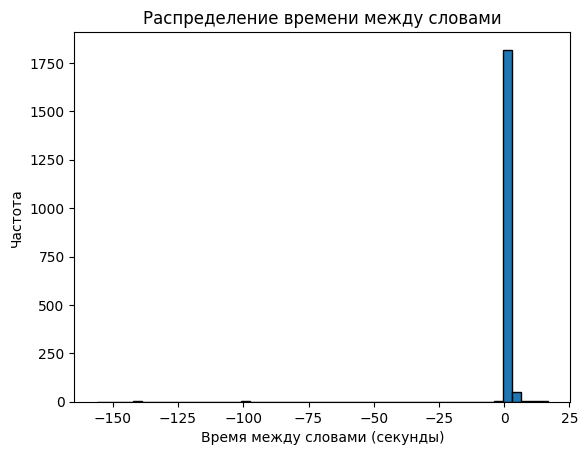

In [41]:
# 1. Число проклятий, летальных исходов и их отношение по фильмам
film_stats = df.groupby('movie')['type'].agg(Total_Curses='count')
film_stats['Total_Curses'] = df[df.type == 'word'].groupby('movie')['type'].count()
film_stats['Lethal_Outcomes'] = df[df.type == 'death'].groupby('movie')['type'].count()
film_stats['Lethal/Curses Ratio'] = film_stats['Lethal_Outcomes'] / film_stats['Total_Curses']

print(film_stats)

# 2. Частота употребления конкретных проклятий
curse_freq = df['word'].value_counts().reset_index()
curse_freq.columns = ['curse word\'s', 'frequency']

print(curse_freq)

# 3. Распределение времени между проклятиями

df['time_difference'] = df['minutes_in'].diff()

df = df[1:]

# Создайте гистограмму для визуализации распределения времени между словами
plt.hist(df['time_difference'], bins=50, edgecolor='k')
plt.xlabel('Время между словами (секунды)')
plt.ylabel('Частота')
plt.title('Распределение времени между словами')
plt.show()